In [71]:
import numpy as np

import os
print(os.getcwd())
# import some functionality from the charts package
%cd ..
%cd ..
from charts.indicators import formulas
from charts.indicators import utilities
%cd analysis/plots

/home/tobias/PycharmProjects/price-indicators/analysis/plots
/home/tobias/PycharmProjects/price-indicators/analysis
/home/tobias/PycharmProjects/price-indicators
/home/tobias/PycharmProjects/price-indicators/analysis/plots


In [72]:
STORAGE_PATH = "../../persisted_data/feather/{}.feather"

def load_data_set(name):
    data = pd.read_feather(STORAGE_PATH.format(name))
    return data

In [73]:
# get some data sets
ibm = load_data_set("IBM_original")

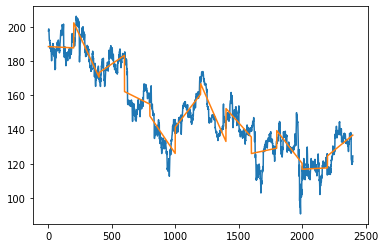

In [78]:
interval = 200

sample = ibm
sample_size = len(sample)
initial_values, slopes = utilities.regression_lines(np.array(sample["current_price"]), interval=interval)
initial_values = initial_values[::interval].repeat(interval)
slopes = slopes[::interval].repeat(interval)
y_regression = initial_values + np.arange(len(initial_values)) * slopes

plt.plot(np.arange(len(initial_values)), sample["current_price"][:len(initial_values)])
plt.plot(np.arange(len(initial_values)), y_regression)
plt.show()


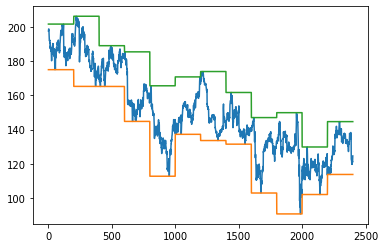

In [81]:
interval = 200

sample = ibm
sample_size = len(sample)
lower, upper = formulas.horizontal_channel(np.array(sample["current_price"]), interval=interval)
lower = lower[interval::interval].repeat(interval)
upper = upper[interval::interval].repeat(interval)

plt.plot(np.arange(len(lower)), sample["current_price"][:len(lower)])
plt.plot(np.arange(len(lower)), lower)
plt.plot(np.arange(len(upper)), upper)

plt.show()